# <h1> Importing Library and Dataset </h1> #

In [ ]:
!pip install optuna
!pip install lazypredict
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 409.6/409.6 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.8/226.8 kB 13.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 8.3 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns

from numpy.random import RandomState
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import linear_model, cluster, datasets
from sklearn.linear_model import Lasso, OrthogonalMatchingPursuit, Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import RobustScaler

import lazypredict
from lazypredict.Supervised import LazyRegressor
from sklearn.linear_model import LinearRegression
from xgboost.sklearn import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn import svm, tree
from sklearn.neighbors import KNeighborsRegressor
from scipy.optimize import minimize
from sklearn.metrics import mean_squared_error as mse
from sklearn.model_selection import cross_val_score, cross_val_predict, cross_validate, KFold
from sklearn import metrics
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.svm import SVR
from mlxtend.regressor import StackingCVRegressor
from catboost import CatBoostRegressor, Pool, cv

from hyperopt import STATUS_OK
from hyperopt import hp
from hyperopt import tpe
from hyperopt import Trials
from hyperopt import fmin, space_eval

import optuna
from optuna.samplers import TPESampler

import time
import warnings
import os
import xgboost
import pickle
import requests

pd.set_option('display.max_columns', 500)
pd.set_option('display.float_format', '{:.8f}'.format)

print("Done")

Done


In [ ]:
df_train = pd.read_csv("https://github.com/JeftaAdriel/DataComp-PekanRistek23/raw/main/Dataset/train.csv")
df_test = pd.read_csv("https://github.com/JeftaAdriel/DataComp-PekanRistek23/raw/main/Dataset/test.csv")
print("Done")

Done


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20355 entries, 0 to 20354
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   timestamp      20355 non-null  object 
 1   api_calls      20355 non-null  float64
 2   clouds         20163 non-null  float64
 3   distance_max   20355 non-null  float64
 4   distance_mean  20355 non-null  float64
 5   distance_min   20355 non-null  float64
 6   humidity       20163 non-null  float64
 7   price_mean     20355 non-null  float64
 8   rain           20163 non-null  float64
 9   surge_max      20355 non-null  float64
 10  surge_mean     20355 non-null  float64
 11  surge_min      20355 non-null  float64
 12  temp           20163 non-null  float64
 13  wind           20163 non-null  float64
 14  type           20355 non-null  int64  
dtypes: float64(13), int64(1), object(1)
memory usage: 2.3+ MB


In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11040 entries, 0 to 11039
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          11040 non-null  int64  
 1   timestamp      11040 non-null  object 
 2   api_calls      11040 non-null  float64
 3   clouds         11040 non-null  float64
 4   distance_max   11040 non-null  float64
 5   distance_mean  11040 non-null  float64
 6   distance_min   11040 non-null  float64
 7   humidity       11040 non-null  float64
 8   rain           11040 non-null  float64
 9   surge_max      11040 non-null  float64
 10  surge_mean     11040 non-null  float64
 11  surge_min      11040 non-null  float64
 12  temp           11040 non-null  float64
 13  wind           11040 non-null  float64
 14  type           11040 non-null  int64  
dtypes: float64(12), int64(2), object(1)
memory usage: 1.3+ MB


# <h1> Part 1: Preprocessing

## <h2> df_train </h2> ##

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20355 entries, 0 to 20354
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   timestamp      20355 non-null  object 
 1   api_calls      20355 non-null  float64
 2   clouds         20163 non-null  float64
 3   distance_max   20355 non-null  float64
 4   distance_mean  20355 non-null  float64
 5   distance_min   20355 non-null  float64
 6   humidity       20163 non-null  float64
 7   price_mean     20355 non-null  float64
 8   rain           20163 non-null  float64
 9   surge_max      20355 non-null  float64
 10  surge_mean     20355 non-null  float64
 11  surge_min      20355 non-null  float64
 12  temp           20163 non-null  float64
 13  wind           20163 non-null  float64
 14  type           20355 non-null  int64  
dtypes: float64(13), int64(1), object(1)
memory usage: 2.3+ MB


In [ ]:
df_train.head()

,timestamp,api_calls,clouds,distance_max,distance_mean,distance_min,humidity,price_mean,rain,surge_max,surge_mean,surge_min,temp,wind,type
0,2018-11-26 06:00:00,9.00000000,0.99066667,3.03000000,1.72666667,1.04000000,0.91333333,16.55555556,0.00000000,1.50000000,1.05555556,1.00000000,40.62733333,1.35066667,0
1,2018-11-26 07:00:00,10.00000000,0.97000000,2.67000000,1.69000000,1.09000000,0.92000000,17.30000000,0.00000000,2.00000000,1.10000000,1.00000000,41.13750000,1.73500000,0
2,2018-11-26 08:00:00,1.00000000,0.98000000,1.38000000,1.38000000,1.38000000,0.92333333,13.50000000,0.00000000,1.00000000,1.00000000,1.00000000,40.92000000,1.33000000,0
3,2018-11-26 09:00:00,11.00000000,1.00000000,3.08000000,1.92090909,1.39000000,0.92750000,17.95454545,0.00000000,1.75000000,1.11363636,1.00000000,40.93750000,1.36500000,0
4,2018-11-26 10:00:00,12.00000000,0.99500000,3.01000000,2.12250000,1.07000000,0.94000000,18.62500000,0.00000000,1.50000000,1.08333333,1.00000000,40.69500000,1.89500000,0


Correcting variable type for `timestamp`

In [ ]:
df_train['timestamp'] = pd.to_datetime(df_train['timestamp'])
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20355 entries, 0 to 20354
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   timestamp      20355 non-null  datetime64[ns]
 1   api_calls      20355 non-null  float64       
 2   clouds         20163 non-null  float64       
 3   distance_max   20355 non-null  float64       
 4   distance_mean  20355 non-null  float64       
 5   distance_min   20355 non-null  float64       
 6   humidity       20163 non-null  float64       
 7   price_mean     20355 non-null  float64       
 8   rain           20163 non-null  float64       
 9   surge_max      20355 non-null  float64       
 10  surge_mean     20355 non-null  float64       
 11  surge_min      20355 non-null  float64       
 12  temp           20163 non-null  float64       
 13  wind           20163 non-null  float64       
 14  type           20355 non-null  int64         
dtypes: datetime64[ns](1

### <h2> Missing Values </h2> ###

In [ ]:
df_train.isna().sum()

timestamp          0
api_calls          0
clouds           192
distance_max       0
distance_mean      0
distance_min       0
humidity         192
price_mean         0
rain             192
surge_max          0
surge_mean         0
surge_min          0
temp             192
wind             192
type               0
dtype: int64

In [ ]:
df_train.isna().sum()/len(df_train)

timestamp       0.00000000
api_calls       0.00000000
clouds          0.00943257
distance_max    0.00000000
distance_mean   0.00000000
distance_min    0.00000000
humidity        0.00943257
price_mean      0.00000000
rain            0.00943257
surge_max       0.00000000
surge_mean      0.00000000
surge_min       0.00000000
temp            0.00943257
wind            0.00943257
type            0.00000000
dtype: float64

In [ ]:
df_train.dropna(axis=0, inplace = True)

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20163 entries, 0 to 20354
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   timestamp      20163 non-null  datetime64[ns]
 1   api_calls      20163 non-null  float64       
 2   clouds         20163 non-null  float64       
 3   distance_max   20163 non-null  float64       
 4   distance_mean  20163 non-null  float64       
 5   distance_min   20163 non-null  float64       
 6   humidity       20163 non-null  float64       
 7   price_mean     20163 non-null  float64       
 8   rain           20163 non-null  float64       
 9   surge_max      20163 non-null  float64       
 10  surge_mean     20163 non-null  float64       
 11  surge_min      20163 non-null  float64       
 12  temp           20163 non-null  float64       
 13  wind           20163 non-null  float64       
 14  type           20163 non-null  int64         
dtypes: datetime64[ns](1

In [ ]:
df_train[df_train.duplicated()]

,timestamp,api_calls,clouds,distance_max,distance_mean,distance_min,humidity,price_mean,rain,surge_max,surge_mean,surge_min,temp,wind,type


In [ ]:
df_train['type'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95])

## <h2> df_test </h2> ##

In [ ]:
df_test['timestamp'] = pd.to_datetime(df_test['timestamp'])
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11040 entries, 0 to 11039
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   index          11040 non-null  int64         
 1   timestamp      11040 non-null  datetime64[ns]
 2   api_calls      11040 non-null  float64       
 3   clouds         11040 non-null  float64       
 4   distance_max   11040 non-null  float64       
 5   distance_mean  11040 non-null  float64       
 6   distance_min   11040 non-null  float64       
 7   humidity       11040 non-null  float64       
 8   rain           11040 non-null  float64       
 9   surge_max      11040 non-null  float64       
 10  surge_mean     11040 non-null  float64       
 11  surge_min      11040 non-null  float64       
 12  temp           11040 non-null  float64       
 13  wind           11040 non-null  float64       
 14  type           11040 non-null  int64         
dtypes: datetime64[ns](1

# <h1> Part 2: Quick Visualization & Gaining Insights </h1> #

In [ ]:
df_train['hour'] = df_train['timestamp'].dt.hour
df_train['dw'] = df_train['timestamp'].dt.day_of_week
df_train['dm'] = df_train['timestamp'].dt.day

print(f"Unique Values hour: {df_train['hour'].unique()}")
print(f"Unique Values dw: {df_train['dw'].unique()}")
print(f"Unique Values dm: {df_train['dm'].unique()}")

df_train.info()

Unique Values hour: [ 6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23  0  1  2  3  4  5]
Unique Values dw: [0 1 2 3 4 5 6]
Unique Values dm: [26 27 28 29 30  1  2  3  4  9 10 13]
<class 'pandas.core.frame.DataFrame'>
Int64Index: 20163 entries, 0 to 20354
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   timestamp      20163 non-null  datetime64[ns]
 1   api_calls      20163 non-null  float64       
 2   clouds         20163 non-null  float64       
 3   distance_max   20163 non-null  float64       
 4   distance_mean  20163 non-null  float64       
 5   distance_min   20163 non-null  float64       
 6   humidity       20163 non-null  float64       
 7   price_mean     20163 non-null  float64       
 8   rain           20163 non-null  float64       
 9   surge_max      20163 non-null  float64       
 10  surge_mean     20163 non-null  float64       
 11  surge_min      20163 non-null  float64 

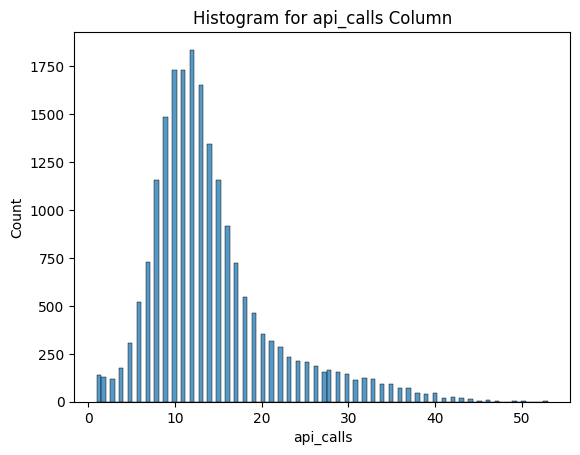

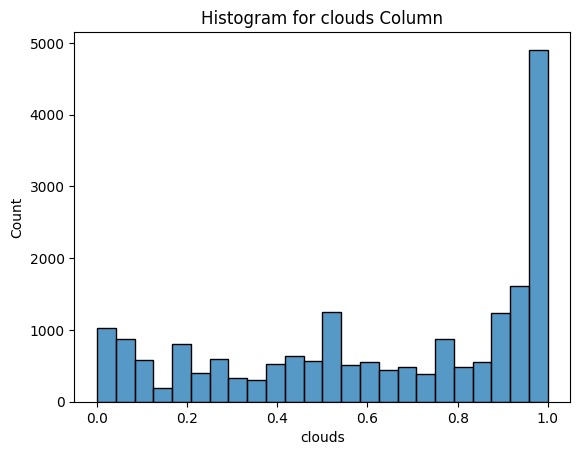

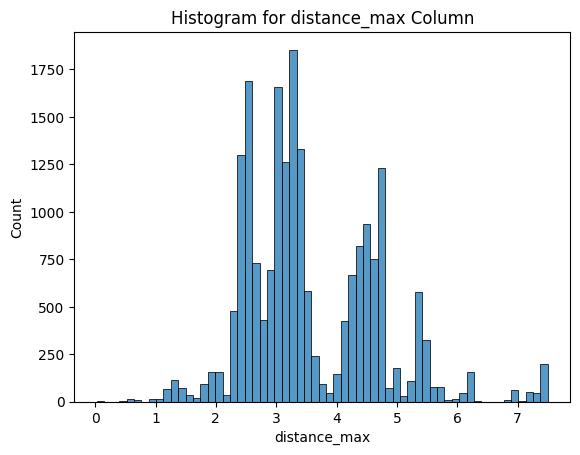

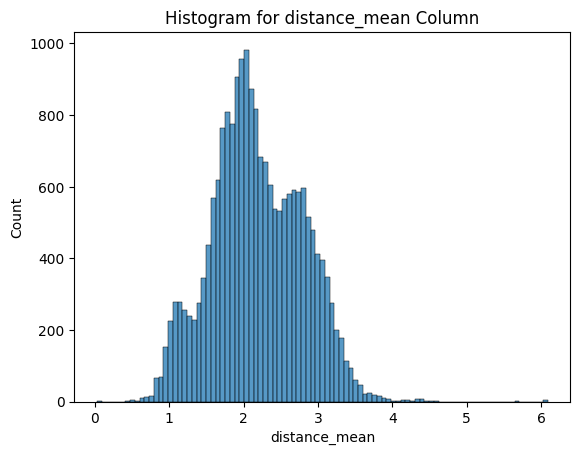

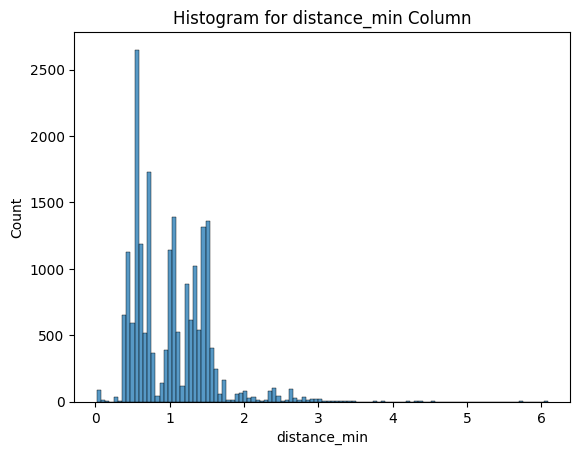

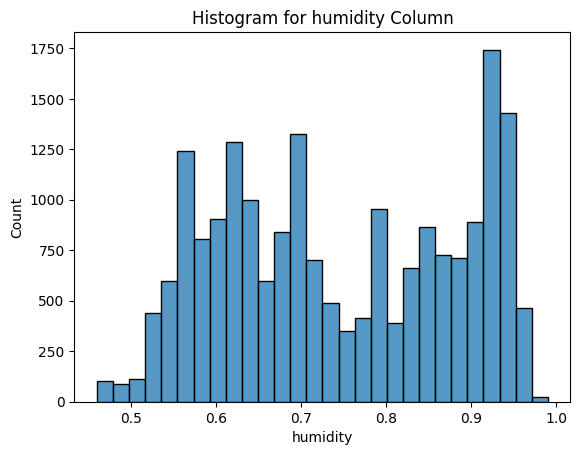

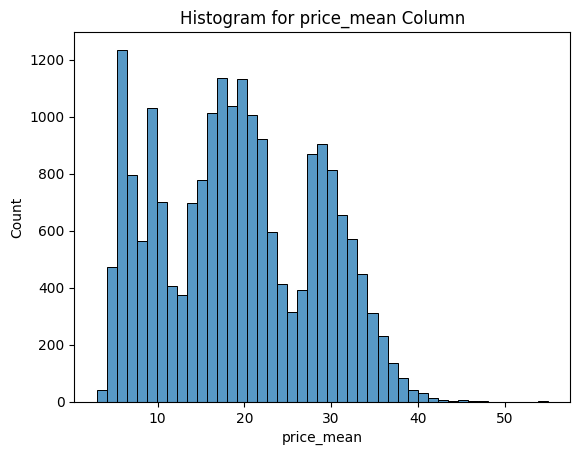

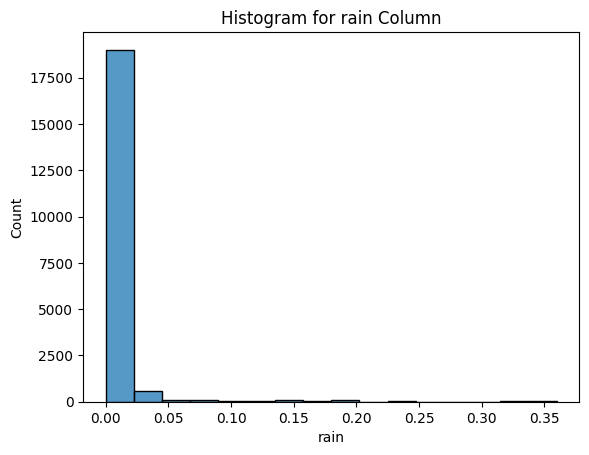

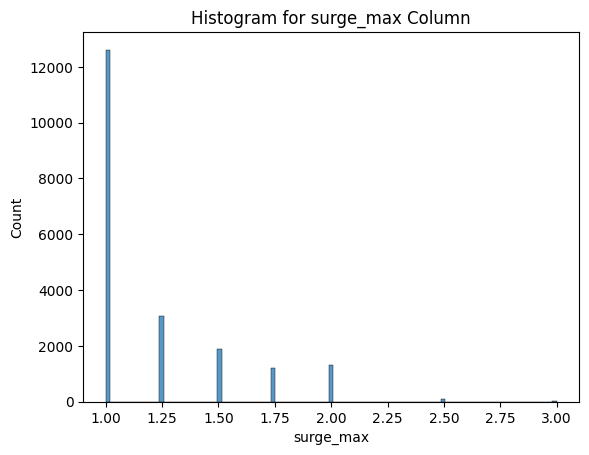

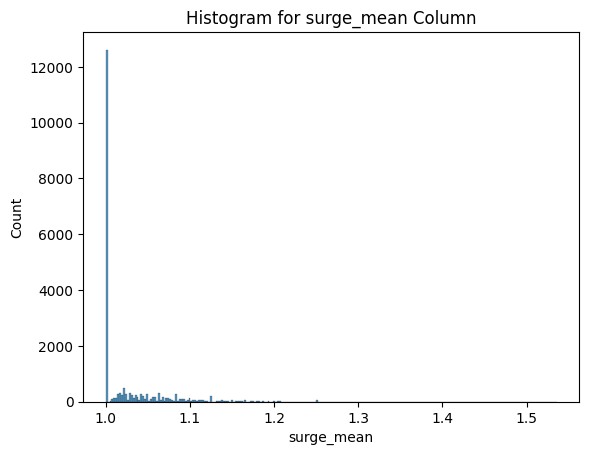

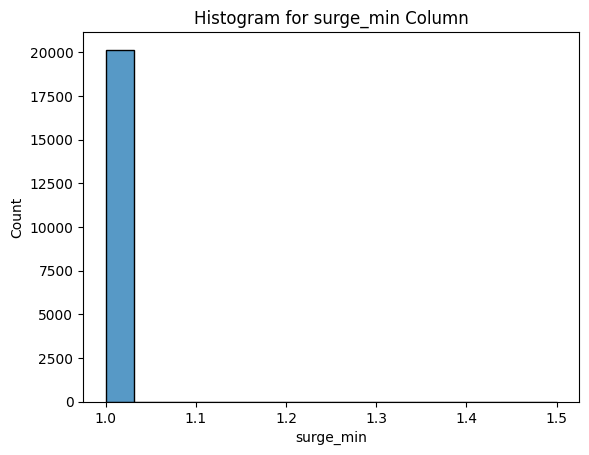

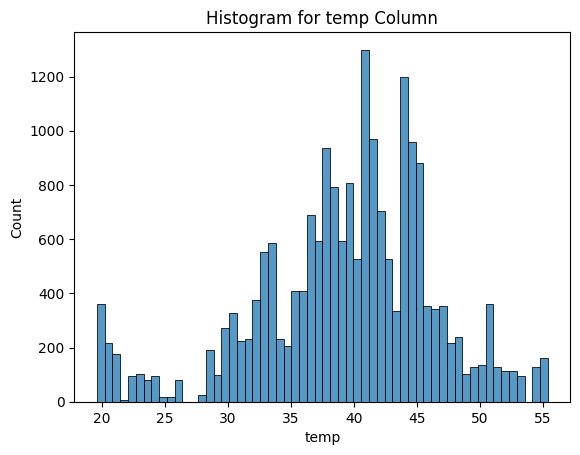

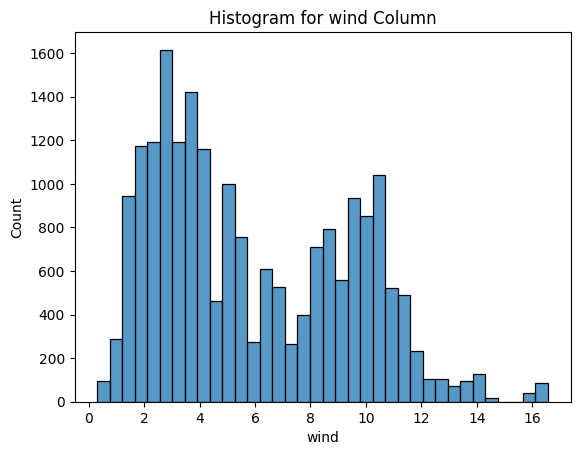

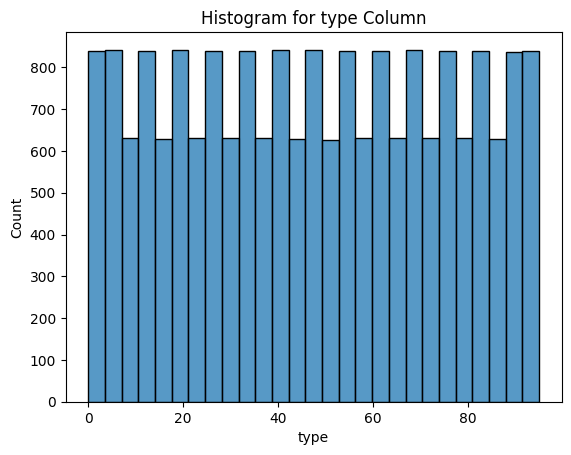

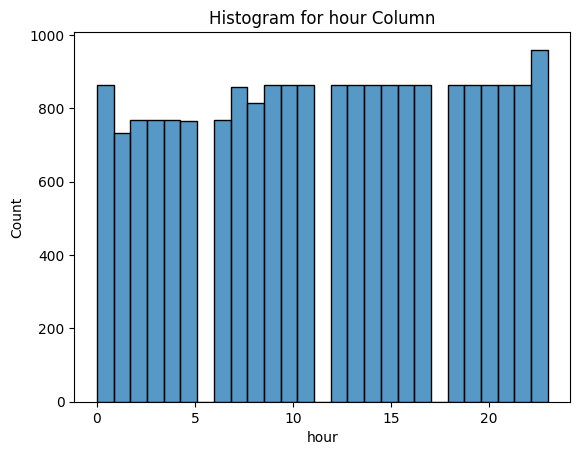

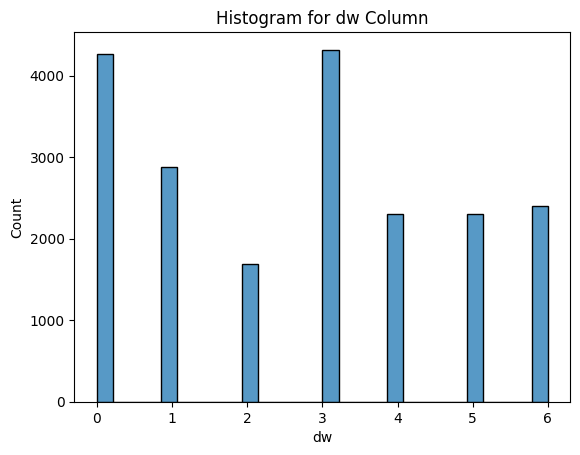

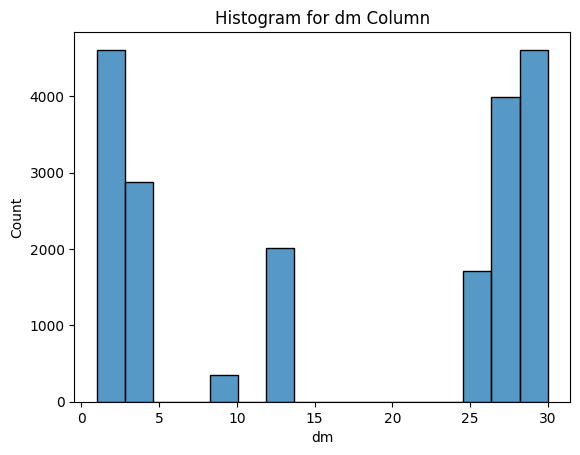

In [ ]:
num = df_train.select_dtypes(include = np.number).columns.tolist()
for n in num:
  sns.histplot(x = n, data = df_train)
  plt.title(f"Histogram for {n} Column")
  print("")
  plt.show()

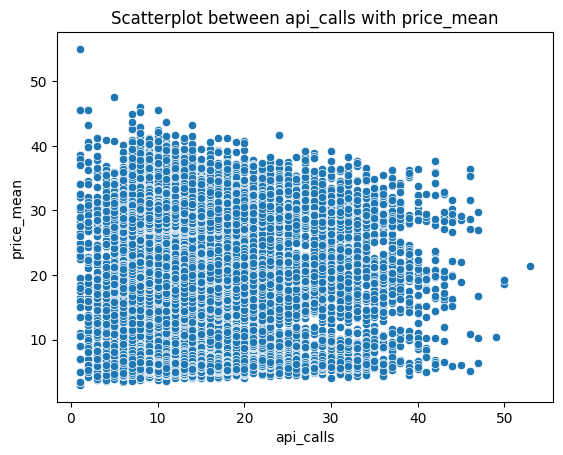

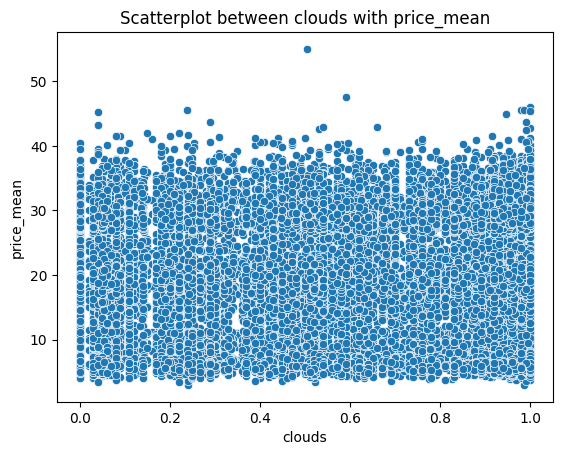

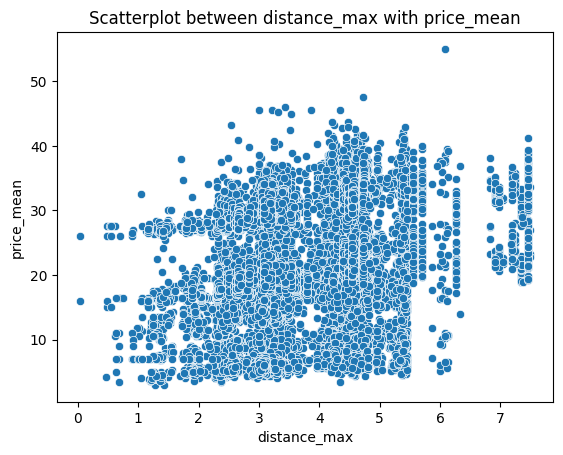

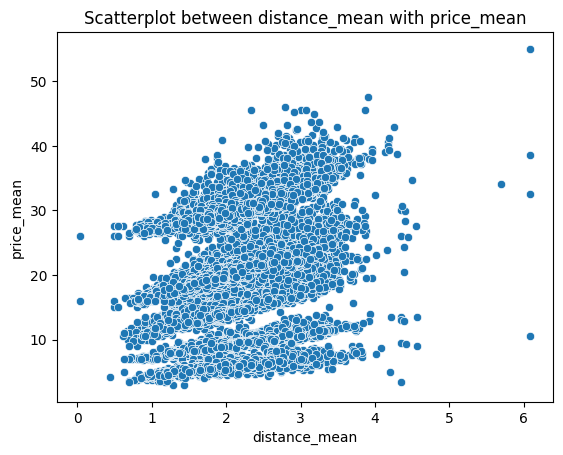

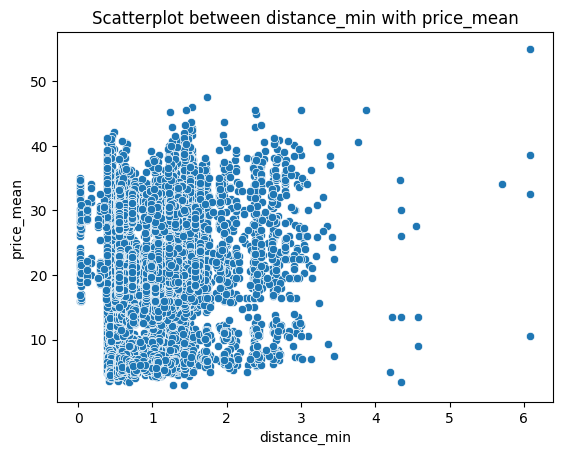

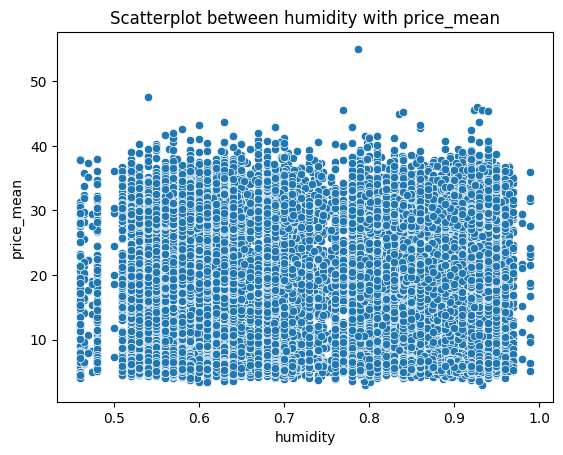

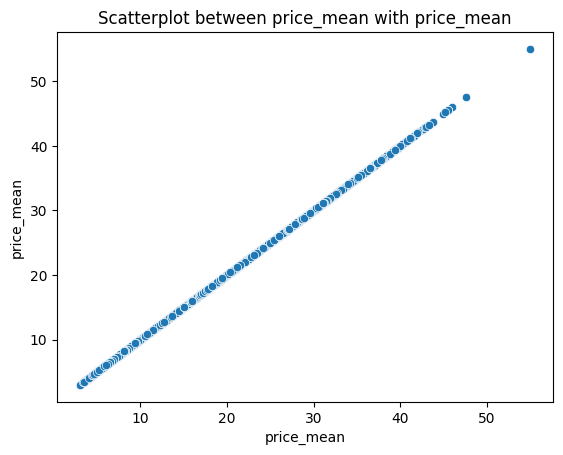

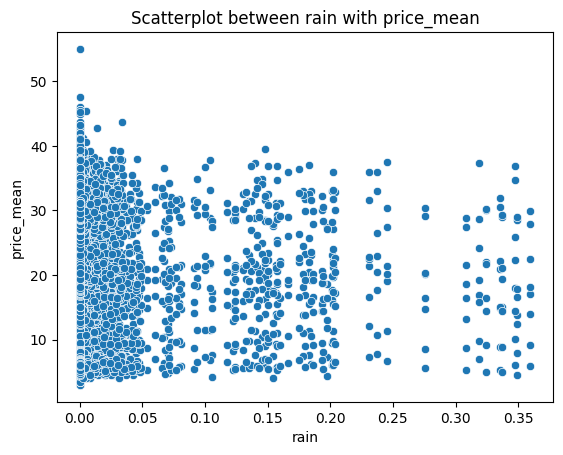

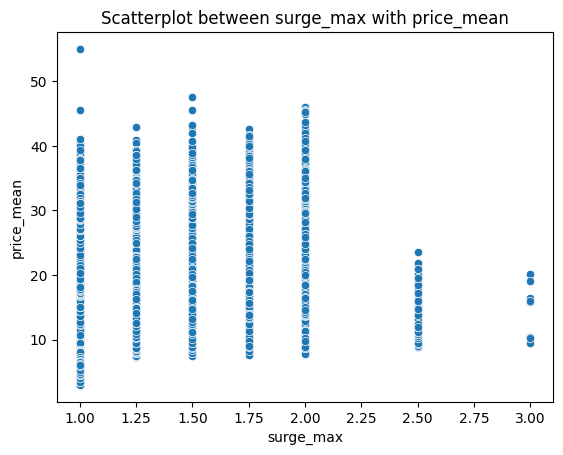

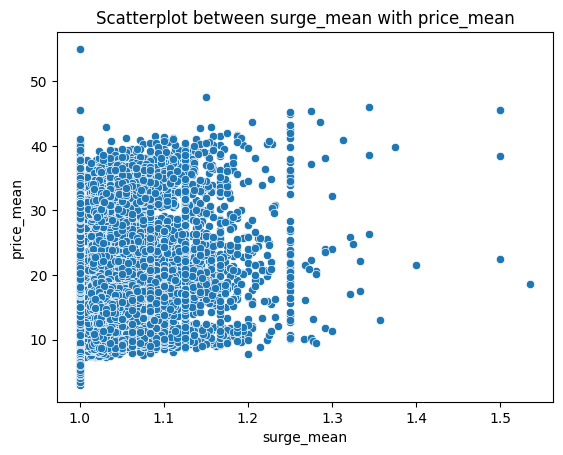

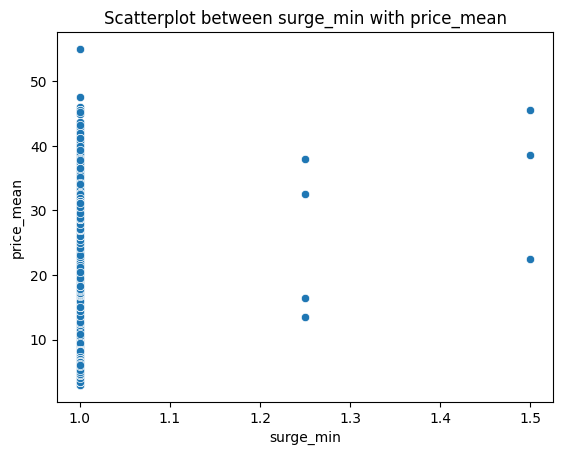

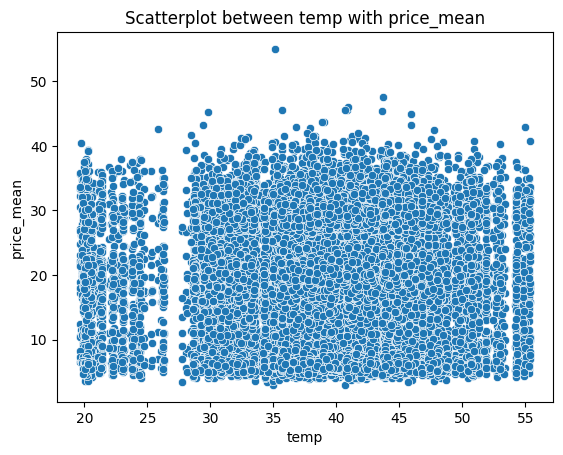

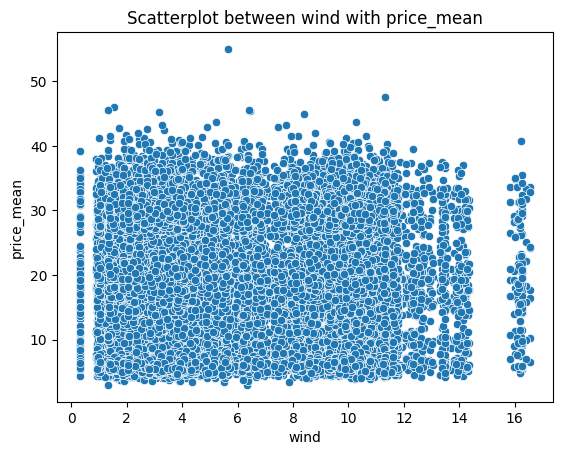

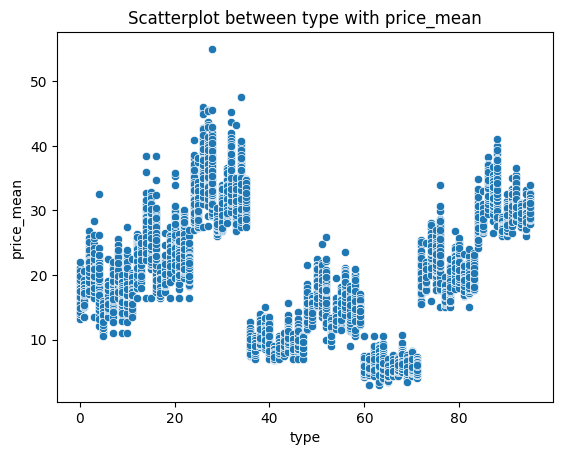

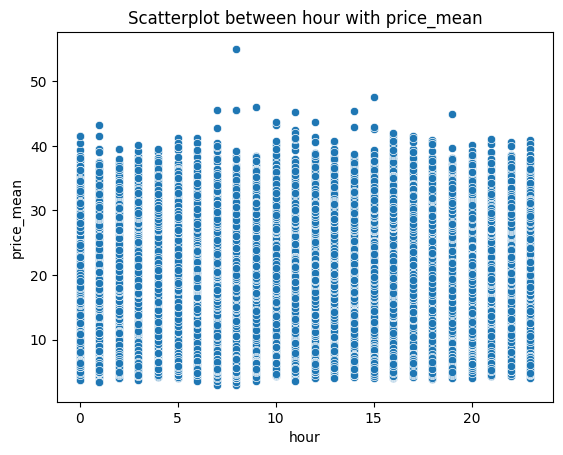

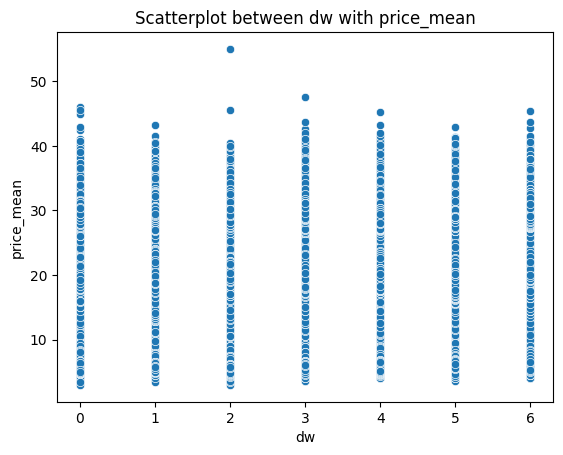

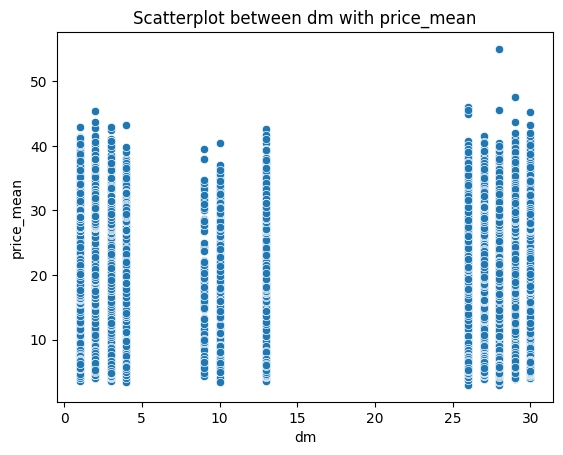

In [ ]:
num = df_train.select_dtypes(include = np.number).columns.tolist()
for n in num:
  sns.scatterplot(x = n, y = 'price_mean', data = df_train)
  plt.title(f"Scatterplot between {n} with price_mean")
  print("")
  plt.show()

In [ ]:
df_train.groupby(["dw"])["api_calls", "price_mean"].agg(["mean"])

,api_calls,price_mean
,mean,mean
dw,,
0,11.01077031,19.25184437
1,18.35416667,19.36880008
2,26.08659549,19.36111956
3,13.70379805,19.35624293
4,11.72092014,19.29865244
5,11.89539931,19.37046443
6,11.66166667,19.40313753


In [ ]:
df_train.describe()

,api_calls,clouds,distance_max,distance_mean,distance_min,humidity,price_mean,rain,surge_max,surge_mean,surge_min,temp,wind,type,hour,dw,dm
count,20163.00000000,20163.00000000,20163.00000000,20163.00000000,20163.00000000,20163.00000000,20163.00000000,20163.00000000,20163.00000000,20163.00000000,20163.00000000,20163.00000000,20163.00000000,20163.00000000,20163.00000000,20163.00000000,20163.00000000
mean,14.15672271,0.63213962,3.56980558,2.18394523,1.01257948,0.74639740,19.33695638,0.00601334,1.20235084,1.02328816,1.00012399,39.37181839,5.93502502,47.48693151,11.81223032,2.69513465,16.64375341
std,7.13617860,0.33575968,1.11176393,0.60857281,0.49821924,0.13861236,8.94147937,0.02957030,0.32136837,0.04286984,0.00704151,7.12432394,3.47468354,27.70753570,6.90426946,2.02762140,12.19711727
min,1.00000000,0.00000000,0.03000000,0.03000000,0.02000000,0.46000000,3.00000000,0.00000000,1.00000000,1.00000000,1.00000000,19.62000000,0.30000000,0.00000000,0.00000000,0.00000000,1.00000000
25%,10.00000000,0.36666667,2.73000000,1.76724101,0.58000000,0.63000000,11.50000000,0.00000000,1.00000000,1.00000000,1.00000000,35.72000000,2.94000000,23.00000000,6.00000000,1.00000000,3.00000000
50%,13.00000000,0.70000000,3.30000000,2.12900000,1.01000000,0.72500000,19.00000000,0.00000000,1.00000000,1.00000000,1.00000000,40.25500000,5.12000000,47.00000000,12.00000000,3.00000000,26.00000000
75%,17.00000000,0.95500000,4.42000000,2.64200000,1.35000000,0.89000000,27.38235294,0.00000000,1.25000000,1.03125000,1.00000000,44.16000000,9.14500000,71.00000000,18.00000000,4.00000000,28.00000000
max,53.00000000,1.00000000,7.50000000,6.09000000,6.09000000,0.99000000,55.00000000,0.35982500,3.00000000,1.53571429,1.50000000,55.41000000,16.57000000,95.00000000,23.00000000,6.00000000,30.00000000


In [ ]:
# Get unique types
types = df_train['type'].unique()

# For each type
for t in types:
    # Filter data
    filtered_data = df_train[df_train['type'] == t]

    # Create scatterplot
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=filtered_data, x='distance_max', y='price_mean')

    plt.title(f'Scatterplot of distance_max vs price_mean for type {t}')
    plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# For each type
for t in types:
    # Filter data
    filtered_data = df_train[df_train['type'] == t]

    # Create scatterplot
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=filtered_data, x='surge_mean', y='price_mean')

    plt.title(f'Scatterplot of surge_mean vs price_mean for type {t}')
    plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# Get unique types
types = df_train['type'].unique()

# For each type
for t in types:
    # Filter data
    filtered_data = df_train[df_train['type'] == t]

    # Create scatterplot
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=filtered_data, x='distance_mean', y='price_mean')

    plt.title(f'Scatterplot of distance_mean vs price_mean for type {t}')
    plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
df_train.groupby('type')['distance_mean'].agg(['var']).sort_values(by='var', ascending=False)

,var
type,
64,0.40209802
76,0.38593929
16,0.35682718
4,0.34592438
88,0.34583992
...,...
61,0.01946986
49,0.01872978
73,0.01795562


# <h1> Part 3: Feature Engineering </h1> #

## <h2> Variables calculating distance for time(s) </h2> ##

### <h2> df_train </h2> ###

In [ ]:
def time_features_distance(df):

  time = pd.to_datetime(df['timestamp'])

  hour = time.dt.hour
  dw = time.dt.day_of_week
  dm = time.dt.day

  for time, col in zip([hour, dm, dw], ['hour', 'dm', 'dw']):
    time_range = {'hour': 24, 'dw': 7, 'dm': 31,}
    df[f'{col}_sin'] = np.sin(time * (2 * np.pi / time_range[col]))
    df[f'{col}_cos'] = np.cos(time * (2 * np.pi / time_range[col]))

  df['hour'] = hour
  df['dw'] = dw
  df['dm'] = dm

In [ ]:
time_features_distance(df_train)
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20163 entries, 0 to 20354
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   timestamp      20163 non-null  datetime64[ns]
 1   api_calls      20163 non-null  float64       
 2   clouds         20163 non-null  float64       
 3   distance_max   20163 non-null  float64       
 4   distance_mean  20163 non-null  float64       
 5   distance_min   20163 non-null  float64       
 6   humidity       20163 non-null  float64       
 7   price_mean     20163 non-null  float64       
 8   rain           20163 non-null  float64       
 9   surge_max      20163 non-null  float64       
 10  surge_mean     20163 non-null  float64       
 11  surge_min      20163 non-null  float64       
 12  temp           20163 non-null  float64       
 13  wind           20163 non-null  float64       
 14  type           20163 non-null  int64         
 15  hour           2016

In [ ]:
df_train.head(5)

,timestamp,api_calls,clouds,distance_max,distance_mean,distance_min,humidity,price_mean,rain,surge_max,surge_mean,surge_min,temp,wind,type,hour,dw,dm,hour_sin,hour_cos,dm_sin,dm_cos,dw_sin,dw_cos
0,2018-11-26 06:00:00,9.00000000,0.99066667,3.03000000,1.72666667,1.04000000,0.91333333,16.55555556,0.00000000,1.50000000,1.05555556,1.00000000,40.62733333,1.35066667,0,6,0,26,1.00000000,0.00000000,-0.84864426,0.52896401,0.00000000,1.00000000
1,2018-11-26 07:00:00,10.00000000,0.97000000,2.67000000,1.69000000,1.09000000,0.92000000,17.30000000,0.00000000,2.00000000,1.10000000,1.00000000,41.13750000,1.73500000,0,7,0,26,0.96592583,-0.25881905,-0.84864426,0.52896401,0.00000000,1.00000000
2,2018-11-26 08:00:00,1.00000000,0.98000000,1.38000000,1.38000000,1.38000000,0.92333333,13.50000000,0.00000000,1.00000000,1.00000000,1.00000000,40.92000000,1.33000000,0,8,0,26,0.86602540,-0.50000000,-0.84864426,0.52896401,0.00000000,1.00000000
3,2018-11-26 09:00:00,11.00000000,1.00000000,3.08000000,1.92090909,1.39000000,0.92750000,17.95454545,0.00000000,1.75000000,1.11363636,1.00000000,40.93750000,1.36500000,0,9,0,26,0.70710678,-0.70710678,-0.84864426,0.52896401,0.00000000,1.00000000
4,2018-11-26 10:00:00,12.00000000,0.99500000,3.01000000,2.12250000,1.07000000,0.94000000,18.62500000,0.00000000,1.50000000,1.08333333,1.00000000,40.69500000,1.89500000,0,10,0,26,0.50000000,-0.86602540,-0.84864426,0.52896401,0.00000000,1.00000000


### <h2> df_test </h2> ###

In [ ]:
time_features_distance(df_test)
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11040 entries, 0 to 11039
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   index          11040 non-null  int64         
 1   timestamp      11040 non-null  datetime64[ns]
 2   api_calls      11040 non-null  float64       
 3   clouds         11040 non-null  float64       
 4   distance_max   11040 non-null  float64       
 5   distance_mean  11040 non-null  float64       
 6   distance_min   11040 non-null  float64       
 7   humidity       11040 non-null  float64       
 8   rain           11040 non-null  float64       
 9   surge_max      11040 non-null  float64       
 10  surge_mean     11040 non-null  float64       
 11  surge_min      11040 non-null  float64       
 12  temp           11040 non-null  float64       
 13  wind           11040 non-null  float64       
 14  type           11040 non-null  int64         
 15  hour_sin       1104

## <h2> Other Variables </h2> ##

In [ ]:
def conditions(df):
  conditions = [
      (df['clouds'] < 0.2),  # clear
      (df['clouds'] >= 0.2) & (df['clouds'] <= 0.7) & (df['rain'] < 0.2),  # cloudy
      (df['rain'] >= 0.2)  # rainy
  ]
  choices = ['clear', 'cloudy', 'rainy']
  df['weather_conditions'] = np.select(conditions, choices, default='unknown')

def create_distance_category(group):
    # Define thresholds for each group
    distance_thresholds = [group['distance_mean'].min(), group['distance_mean'].quantile(0.33), group['distance_mean'].quantile(0.66), group['distance_mean'].max()]

    # Create new feature for distance_mean categories
    group['distance_mean_category'] = pd.cut(group['distance_mean'], bins=distance_thresholds, labels=['short', 'medium', 'long'])

    return group

In [ ]:
conditions(df_train)
df_train = df_train.groupby('type').apply(create_distance_category)

df_train = pd.get_dummies(df_train, columns=['weather_conditions'], drop_first=True)
df_train = pd.get_dummies(df_train, columns=['distance_mean_category'], drop_first=True)
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20163 entries, 0 to 20354
Data columns (total 29 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   timestamp                      20163 non-null  datetime64[ns]
 1   api_calls                      20163 non-null  float64       
 2   clouds                         20163 non-null  float64       
 3   distance_max                   20163 non-null  float64       
 4   distance_mean                  20163 non-null  float64       
 5   distance_min                   20163 non-null  float64       
 6   humidity                       20163 non-null  float64       
 7   price_mean                     20163 non-null  float64       
 8   rain                           20163 non-null  float64       
 9   surge_max                      20163 non-null  float64       
 10  surge_mean                     20163 non-null  float64       
 11  surge_min      

In [ ]:
conditions(df_test)
df_test = df_test.groupby('type').apply(create_distance_category)

df_test = pd.get_dummies(df_test, columns=['weather_conditions'], drop_first=True)
df_test = pd.get_dummies(df_test, columns=['distance_mean_category'], drop_first=True)
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11040 entries, 0 to 11039
Data columns (total 29 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   index                          11040 non-null  int64         
 1   timestamp                      11040 non-null  datetime64[ns]
 2   api_calls                      11040 non-null  float64       
 3   clouds                         11040 non-null  float64       
 4   distance_max                   11040 non-null  float64       
 5   distance_mean                  11040 non-null  float64       
 6   distance_min                   11040 non-null  float64       
 7   humidity                       11040 non-null  float64       
 8   rain                           11040 non-null  float64       
 9   surge_max                      11040 non-null  float64       
 10  surge_mean                     11040 non-null  float64       
 11  surge_min      

# <h1> Part 4: Modelling </h1> #

## <h2> Preparing the Data & Functions </h2> ##

<Axes: >

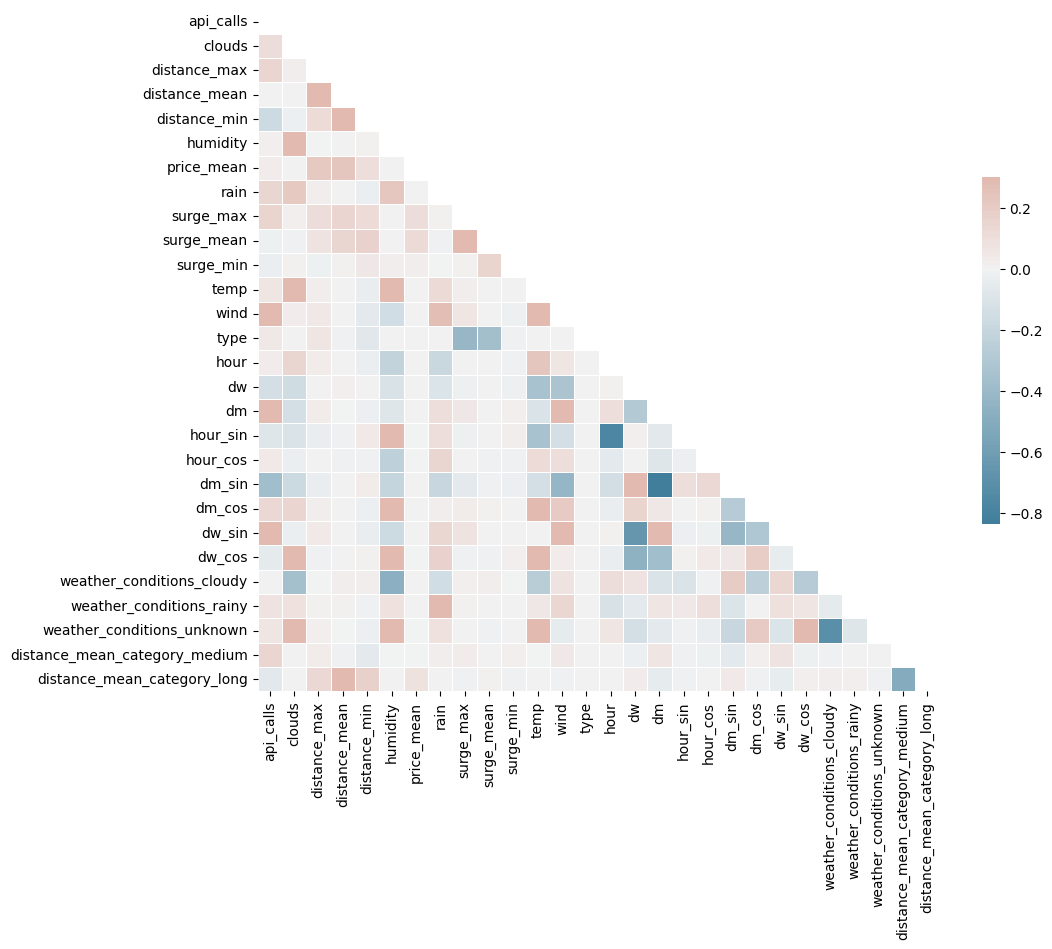

In [ ]:
num = df_train.select_dtypes(include = np.number)
corr = num.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [ ]:
df_train.drop(columns=['timestamp'], axis=1, inplace=True)
df_train = df_train.astype('float64')

df_test.drop(columns=['timestamp', 'index'], axis=1, inplace=True)
df_test = df_test.astype('float64')

print(df_train.info())
print("")
print(df_test.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20163 entries, 0 to 20354
Data columns (total 28 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   api_calls                      20163 non-null  float64
 1   clouds                         20163 non-null  float64
 2   distance_max                   20163 non-null  float64
 3   distance_mean                  20163 non-null  float64
 4   distance_min                   20163 non-null  float64
 5   humidity                       20163 non-null  float64
 6   price_mean                     20163 non-null  float64
 7   rain                           20163 non-null  float64
 8   surge_max                      20163 non-null  float64
 9   surge_mean                     20163 non-null  float64
 10  surge_min                      20163 non-null  float64
 11  temp                           20163 non-null  float64
 12  wind                           20163 non-null 

### <h2> Non-Scaled Version (for Tree Based Model) </h2> ###

In [ ]:

X_train_nonscaled = df_train.drop(columns=['price_mean'], axis=1)
y_train_nonscaled = df_train[['price_mean']]
X_test_nonscaled = df_test.copy()


### <h2> Functions </h2> ###

In [ ]:
def feature_importance_viz(df, model):

  # Assuming features is a list of column names in the order used for training
  features = df.drop(['price_mean'], axis=1).columns.tolist()

  # Get feature importances from your model
  importances = list(model.feature_importances_)

  # Create a DataFrame to make sorting easier
  importance_df = pd.DataFrame({
      'feature': features,
      'importance': importances
  })

  # Sort the DataFrame by importance in descending order
  importance_df = importance_df.sort_values(by='importance', ascending=False)

  # Plot the feature importances
  plt.figure(figsize=(10, 6))
  plt.barh(importance_df['feature'], importance_df['importance'], color='skyblue')
  plt.xlabel('Importance')
  plt.ylabel('Feature')
  plt.title('Feature Importance')
  plt.gca().invert_yaxis()  # Invert the y-axis to show the feature with the highest importance at the top
  plt.show()

## <h2> Catboost </h2> ##

### <h2> Final Version </h2> ###

#### <h2> Hyperparameter Tuning </h2> ####

In [ ]:
start=time.time()

kf = KFold(n_splits=5, shuffle=True, random_state=123)

def objective(trial):
  params = {"random_state": 123,
            "loss_function": "RMSE",
            "iterations": 1000,
            "learning_rate": trial.suggest_float("learning_rate", 0.0785554, 0.0785555, log=True),
            "depth": 7,
            "subsample": trial.suggest_float("subsample", 0.810417, 0.8104171, log=True),
            "colsample_bylevel": trial.suggest_float("colsample_bylevel", 0.8212551, 0.8212552, log=True),
            "l2_leaf_reg": trial.suggest_float("l2_leaf_reg", 0.7833714, 0.7833715, log=True),
            "random_strength": trial.suggest_float("random_strength", 0.0787843, 0.0787845, log=True),
            "min_data_in_leaf": 31}

  model = CatBoostRegressor(**params, silent=True)
  best_score = cross_val_score(model, X_train_nonscaled, y_train_nonscaled, scoring='neg_root_mean_squared_error', cv=kf).mean()
  return -best_score

sampler = TPESampler(seed=123)
study_cb_ver2 = optuna.create_study(direction='minimize', sampler=sampler)
study_cb_ver2.optimize(objective, n_trials=30)

end = time.time()
duration = end - start
print(f"The cell took {duration} seconds to run.")

[I 2023-11-19 11:06:47,354] A new study created in memory with name: no-name-48813f7d-4de0-43c1-aa15-2242981b2512
[I 2023-11-19 11:07:35,472] Trial 0 finished with value: 0.5663982038658654 and parameters: {'learning_rate': 0.0785554696469051, 'subsample': 0.8104170286139323, 'colsample_bylevel': 0.8212551226851443, 'l2_leaf_reg': 0.7833714551314753, 'random_strength': 0.0787844438937427}. Best is trial 0 with value: 0.5663982038658654.
[I 2023-11-19 11:08:20,740] Trial 1 finished with value: 0.5663982058141757 and parameters: {'learning_rate': 0.0785554423106305, 'subsample': 0.8104170980764197, 'colsample_bylevel': 0.8212551684829725, 'l2_leaf_reg': 0.7833714480931886, 'random_strength': 0.07878437842344314}. Best is trial 0 with value: 0.5663982038658654.
[I 2023-11-19 11:09:05,217] Trial 2 finished with value: 0.5665401859301683 and parameters: {'learning_rate': 0.07855543431778726, 'subsample': 0.8104170729049696, 'colsample_bylevel': 0.821255143857223, 'l2_leaf_reg': 0.7833714059

The cell took 1347.8041043281555 seconds to run.


In [ ]:
print('Best hyperparameters:', study_cb_ver2.best_params)
print('Best RMSE:', study_cb_ver2.best_value)

Best hyperparameters: {'learning_rate': 0.07855549997875294, 'subsample': 0.8104170604737282, 'colsample_bylevel': 0.8212551318295364, 'l2_leaf_reg': 0.7833714971263624, 'random_strength': 0.07878446930908768}
Best RMSE: 0.5663982018602592


In [ ]:
study_cb_ver2.trials_dataframe().sort_values('value', ascending=True).head(5)

,number,value,datetime_start,datetime_complete,duration,params_colsample_bylevel,params_l2_leaf_reg,params_learning_rate,params_random_strength,params_subsample,state
27,27,0.56639820,2023-11-19 11:27:01.537094,2023-11-19 11:27:46.127023,0 days 00:00:44.589929,0.82125511,0.78337148,0.07855550,0.07878448,0.81041708,COMPLETE
23,23,0.56639820,2023-11-19 11:24:00.454875,2023-11-19 11:24:45.138901,0 days 00:00:44.684026,0.82125511,0.78337148,0.07855550,0.07878446,0.81041705,COMPLETE
21,21,0.56639820,2023-11-19 11:22:31.224404,2023-11-19 11:23:16.027771,0 days 00:00:44.803367,0.82125511,0.78337150,0.07855550,0.07878448,0.81041706,COMPLETE
16,16,0.56639820,2023-11-19 11:18:48.080985,2023-11-19 11:19:32.834545,0 days 00:00:44.753560,0.82125513,0.78337150,0.07855550,0.07878447,0.81041706,COMPLETE
14,14,0.56639820,2023-11-19 11:17:18.748610,2023-11-19 11:18:03.404783,0 days 00:00:44.656173,0.82125510,0.78337149,0.07855550,0.07878450,0.81041706,COMPLETE


In [ ]:
#Visualize parameter importances.
optuna.visualization.plot_param_importances(study_cb_ver2)

In [ ]:
optuna.visualization.plot_slice(study_cb_ver2)

In [ ]:
optuna.visualization.plot_optimization_history(study_cb_ver2)

#### <h2> Fitting to Train </h2> ####

In [ ]:
# Best Parameter
best_params_cb = study_cb_ver2.best_params

cb2 = CatBoostRegressor(random_state = 123, **best_params_cb, silent=True)

cb2.fit(X_train_nonscaled, y_train_nonscaled)
train_preds_cb2 = cb2.predict(X_train_nonscaled)
train_rmse_cb2 = np.sqrt(mse(y_train_nonscaled, train_preds_cb2))

print(cb2.get_params())
print("")
print(f"Train RMSE CatBoost: {train_rmse_cb2}")

{'learning_rate': 0.07855549997875294, 'l2_leaf_reg': 0.7833714971263624, 'loss_function': 'RMSE', 'silent': True, 'random_strength': 0.07878446930908768, 'subsample': 0.8104170604737282, 'colsample_bylevel': 0.8212551318295364, 'random_state': 123}

Train RMSE CatBoost: 0.4302610284291196


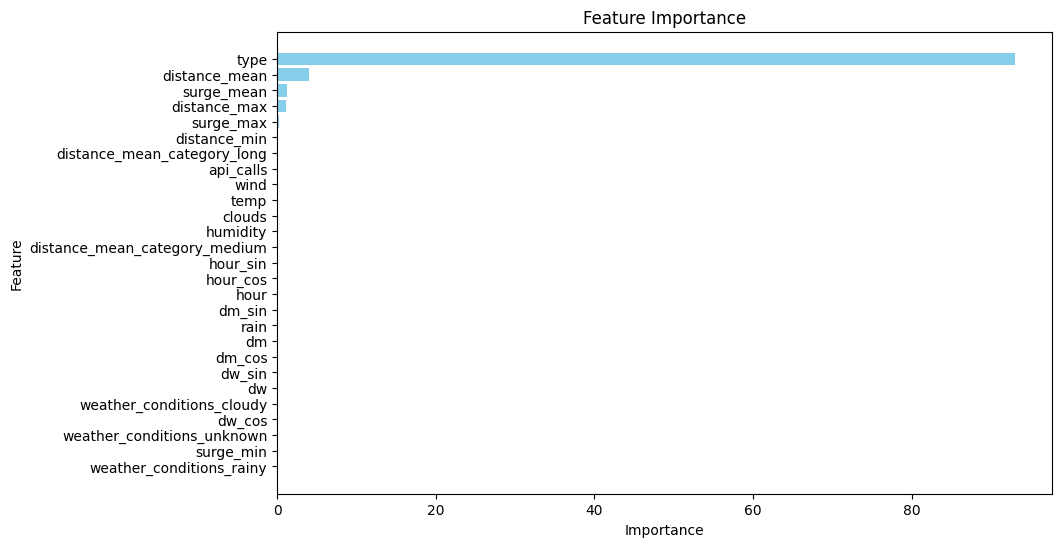

In [ ]:
feature_importance_viz(df_train, cb2)

In [ ]:
analysis = df_train.copy()
analysis['pred'] = train_preds_cb2
analysis['error'] = analysis['price_mean'] - analysis['pred']
analysis['rmse'] = train_rmse_cb2

errors = analysis.groupby('type')[['error', 'rmse']].agg('mean').sort_values(by='error')
errors

,error,rmse
type,,
55.00000000,-0.09387011,0.43026103
71.00000000,-0.08942817,0.43026103
23.00000000,-0.08575505,0.43026103
25.00000000,-0.08398423,0.43026103
53.00000000,-0.08154236,0.43026103
...,...,...
48.00000000,0.08192453,0.43026103
22.00000000,0.08436847,0.43026103
72.00000000,0.09338942,0.43026103


# <h1> Part 5: Submission and Saving Model </h1> #

## <h2> Predictions </h2> ##

In [ ]:
submission = cb2.predict(X_test_nonscaled)

index = np.arange(0, 11040)

df_submission = pd.DataFrame({'index': index, 'price_mean': submission})

df_submission.to_csv('submission (CB Nonscaled 1000 Iterations Distance Mean Category not by variance RMSE CV 0.5663, RMSE Train 0.43026).csv', index=False)

## <h2> Model </h2> ##

In [ ]:
pickle.dump(cb2, open('model_Statset.pkl', 'wb'))

## <h2> Train and Test </h2> ##

In [ ]:
df_train.to_csv('train_Statset.csv')
df_test.to_csv('test_Statset.csv')